
# ----------------------------Applied Machine Learning -------------------------------------------------------------------------------------Group - 16 --------------------------------------------------------

<font size=5 color=coral><bold>  Project3_Classification_Group16_Ashish_Manish </bold></font>

## Step - 1 Exploring and Preparing the Data
    Let's Begin by importing all the libraries and loading the dataset

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
import matplotlib.pyplot as plt

# To supress the warnings
import warnings
warnings.filterwarnings("ignore")

data_audit = pd.read_csv(r'C:\Users\nick2\Desktop\MS\Sem-2\ML\Project 2\audit_risk.csv')
data_trial = pd.read_csv(r'C:\Users\nick2\Desktop\MS\Sem-2\ML\Project 2\trial.csv')

     Exploring the datasets a bit 

In [5]:
data_audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [6]:
data_trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [7]:
print('Shape of Audit Dataset {}'.format(data_audit.shape))
print('\nShape of Trial Dataset {}'.format(data_trial.shape))

print('\nColumns in Audit Dataset\n {}'.format(data_audit.columns.values))
print('\nColumns in Trial Dataset\n {}'.format(data_trial.columns.values))

Shape of Audit Dataset (776, 27)

Shape of Trial Dataset (776, 18)

Columns in Audit Dataset
 ['Sector_score' 'LOCATION_ID' 'PARA_A' 'Score_A' 'Risk_A' 'PARA_B'
 'Score_B' 'Risk_B' 'TOTAL' 'numbers' 'Score_B.1' 'Risk_C' 'Money_Value'
 'Score_MV' 'Risk_D' 'District_Loss' 'PROB' 'RiSk_E' 'History' 'Prob'
 'Risk_F' 'Score' 'Inherent_Risk' 'CONTROL_RISK' 'Detection_Risk'
 'Audit_Risk' 'Risk']

Columns in Trial Dataset
 ['Sector_score' 'LOCATION_ID' 'PARA_A' 'SCORE_A' 'PARA_B' 'SCORE_B'
 'TOTAL' 'numbers' 'Marks' 'Money_Value' 'MONEY_Marks' 'District' 'Loss'
 'LOSS_SCORE' 'History' 'History_score' 'Score' 'Risk']


<b> We need to merge both the datasets, before that we need to check if both the dataframes have same values in all the columns <b>

In [8]:
repeated_columns = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value', 'History', 'Score', 'Risk']

for i in repeated_columns:
    a=sum(data_audit[i]==data_trial[i])
    if a==776:
        print('{} column has same values in both dataframes\n'.format(i))

Sector_score column has same values in both dataframes

LOCATION_ID column has same values in both dataframes

PARA_A column has same values in both dataframes

PARA_B column has same values in both dataframes

TOTAL column has same values in both dataframes

numbers column has same values in both dataframes

History column has same values in both dataframes

Score column has same values in both dataframes



In [9]:
a=sum(data_audit['Score_A']==data_trial['SCORE_A']/10)
b=sum(data_audit['Score_B']==data_trial['SCORE_B']/10)
if a==776:
    print('Score_A column has same values in both dataframes\n')
if b==776:
    print('Score_B column has same values in both dataframes')

Score_A column has same values in both dataframes

Score_B column has same values in both dataframes


- <b>Looks like all the columns have same values except Money_Value and Risk columns, Score_A and Score_B are also same except for the fact that in trial.csv both of these columns are divided by 10.</b>

- <b>Let's explore further columns Money_value and Risk</b>

In [10]:
print(sum(data_audit['Money_Value']==data_trial['Money_Value']))
print(sum(data_audit['Risk']==data_trial['Risk']))
print(sum(data_audit['District_Loss']==data_trial['District']))

775
595
776


    - It means there is only value different for Money_Value column in both dataframes and there are 181 values different for Risk column in both dataframes. We will ignore 1 different Value for Money_Value column and keep all the values from audit dataset, For Risk column also we are choosing to go with values in Audit Dataset

    - On Random Comparison we also found that District_Loss column in audit dataset is same as District column in trial dataset, just the column names are different. So as with other columns, we are going with District_Loss column and we will not be including District Column in our final dataset

In [11]:
data_trial['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

# Dropping records from data for which Location ID is non-numeric

In [12]:
data_trial=data_trial[data_trial['LOCATION_ID']!='LOHARU']
data_trial=data_trial[data_trial['LOCATION_ID']!='NUH']
data_trial=data_trial[data_trial['LOCATION_ID']!='SAFIDON']

### Dropping Repeated columns

In [13]:
# Dropping repeated columns from trial dataset in order to prepare it to merge with audit dataset
repeated_columns = ['Sector_score', 'District','LOCATION_ID', 'PARA_A', 'SCORE_A','PARA_B','SCORE_B',
                     'TOTAL', 'numbers','Money_Value','History','Score','Risk']
data_trial.drop(columns=repeated_columns, inplace=True, axis=1)

In [15]:
dataset=pd.concat([data_audit,data_trial], axis=1)

### Finding Null values in the final dataset

In [16]:
dataset.isnull().any()
dataset.dropna(inplace=True)

    Only one missing value was there in a column, so we decided to drop that observation from the data. As there is only one missing value I have decided to drop that observation instead of imputing it.

    Detection_Risk column has only one value for the whole column which is 0.5. It is not going to be helpful in building a model so we are dropping this column from the dataset.
    
    Also We are dropping Location_Id column as it is not going explain any variation in the dependent variable

In [34]:
dataset.drop(columns=['Detection_Risk','LOCATION_ID'],inplace=True,axis=1)

### Let's find out if we have any high correlations between independent variables

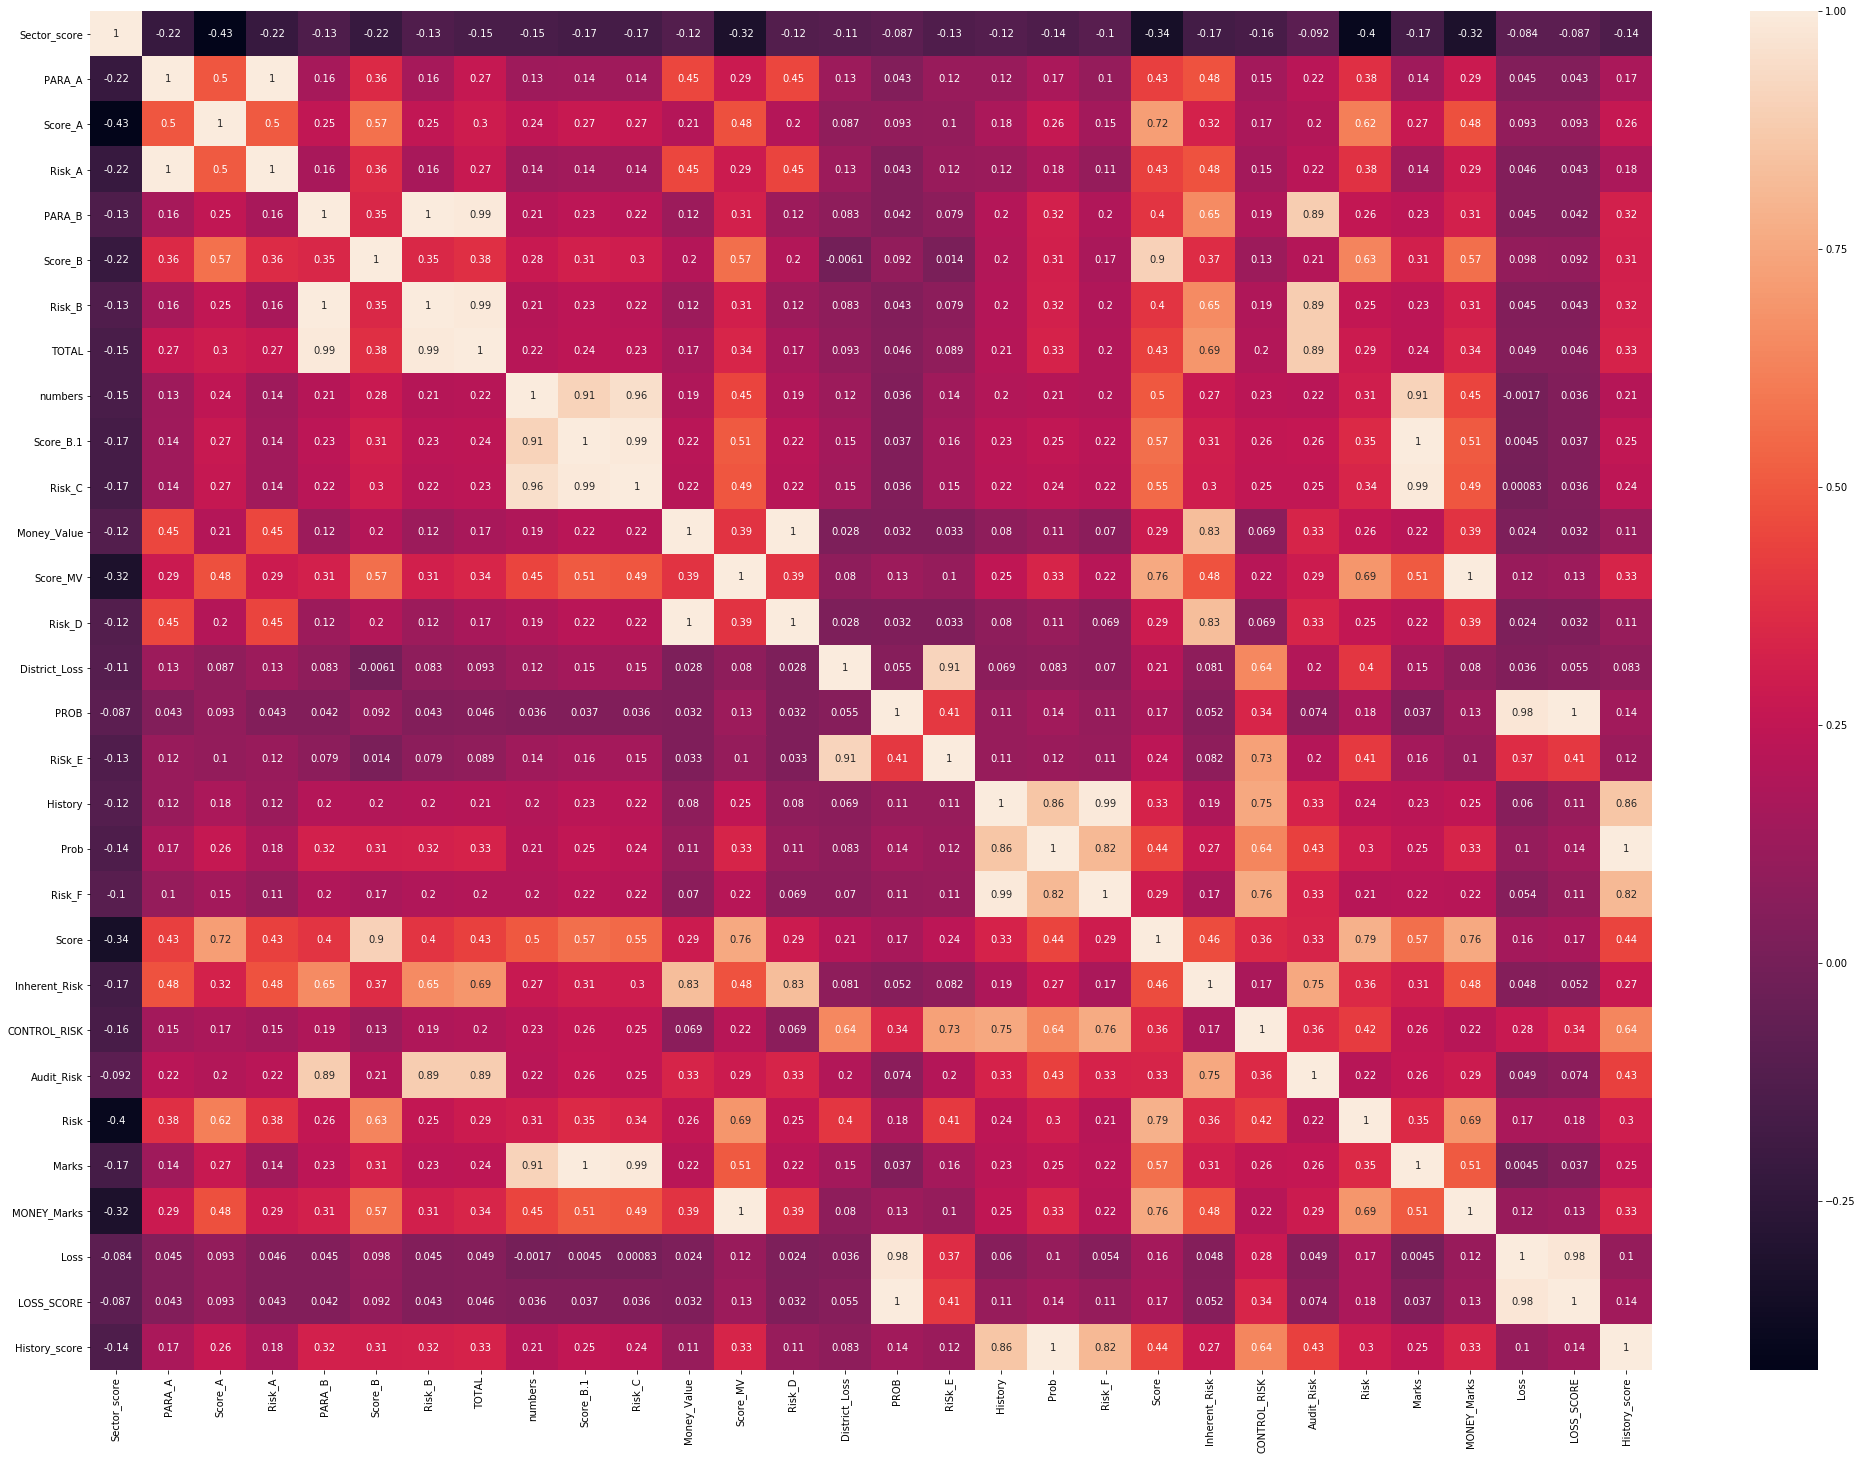

In [14]:
plt.figure(figsize=(35,25)) 
sns.heatmap(dataset.corr(), annot=True) 

- We have found some perfect correlations and on digging futher into the linear dependencies and correlations we have decided to take below actions 
- Few other dependencies we have discovered and we are keeping one out of the two columns
- We are keeping Marks, History_score, MONEY_Marks and Loss, and dropping Score_B.1,Prob, PROB, LOSS_SCORE and Score_MV as these columns are nothing but derived from the former columns only and will not help much in explaining the variation in the dependent variable

In [36]:
dataset.columns


Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks', 'Loss', 'LOSS_SCORE',
       'History_score'],
      dtype='object')

In [37]:
print(sum(dataset['History_score']/10==dataset['Prob']))
print(sum(dataset['LOSS_SCORE']/10==dataset['PROB']))
print(sum(dataset['Score_MV']*10==dataset['MONEY_Marks']))
print(sum(dataset['Loss']==dataset['LOSS_SCORE']-2))

772
772
772
750


In [38]:
dataset.drop(columns=['Score_B.1','Prob', 'PROB', 'Score_MV','LOSS_SCORE'],inplace=True,axis=1)

- We found another interesting relationship among columns in the data, where Risk A added upto Risk E is the total Inherent Risk, so We are dropping Risk A, Risk B, Risk C, Risk D, Risk E and Risk F and keeping Inherent Risk. 
- Firstly we do not want any Linear Dependency and secondly it will increase the computational efficiency.

In [40]:
a=dataset['Risk_A']+dataset['Risk_B']+dataset['Risk_C']+dataset['Risk_D']+dataset['RiSk_E']+dataset['Risk_F']
df=pd.concat([a,dataset['Inherent_Risk']],axis=1)
df=df.round(3)
sum(df[0]==df['Inherent_Risk'])


# for 770 rows out of 775 Sum of Risk A to RIsk F equals Inherent RIsk

770

In [41]:
dataset.drop(columns=['Risk_A','Risk_B','Risk_C','Risk_D','RiSk_E','Risk_F'],axis=1, inplace=True)

In [42]:
dataset.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL',
       'numbers', 'Money_Value', 'District_Loss', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Risk', 'Marks',
       'MONEY_Marks', 'Loss', 'History_score'],
      dtype='object')

### Exploring the data 
By exploring we are trying to check for different type of data we have in our dataset. For exploring we are using decribe() function. 

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 775
Data columns (total 19 columns):
Sector_score     772 non-null float64
PARA_A           772 non-null float64
Score_A          772 non-null float64
PARA_B           772 non-null float64
Score_B          772 non-null float64
TOTAL            772 non-null float64
numbers          772 non-null float64
Money_Value      772 non-null float64
District_Loss    772 non-null int64
History          772 non-null int64
Score            772 non-null float64
Inherent_Risk    772 non-null float64
CONTROL_RISK     772 non-null float64
Audit_Risk       772 non-null float64
Risk             772 non-null int64
Marks            772 non-null float64
MONEY_Marks      772 non-null float64
Loss             772 non-null float64
History_score    772 non-null float64
dtypes: float64(16), int64(3)
memory usage: 120.6 KB


In [44]:
dataset.describe()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,Loss,History_score
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,20.209404,2.460869,0.352073,10.855947,0.313731,13.284950,5.068005,14.191093,2.507772,0.104922,2.706218,17.764268,0.573575,7.203708,0.395078,2.238342,2.914508,0.029793,2.168394
std,24.322215,5.691631,0.174163,50.207317,0.170048,51.437422,0.265089,66.730436,1.231321,0.532353,0.859652,54.869671,0.445559,38.764503,0.489184,0.805417,1.600242,0.184745,0.681523
min,1.850000,0.000000,0.200000,0.000000,0.200000,0.000000,5.000000,0.000000,2.000000,0.000000,2.000000,1.400000,0.400000,0.280000,0.000000,2.000000,2.000000,0.000000,2.000000
25%,2.370000,0.207500,0.200000,0.000000,0.200000,0.555000,5.000000,0.000000,2.000000,0.000000,2.000000,1.584000,0.400000,0.316800,0.000000,2.000000,2.000000,0.000000,2.000000
50%,3.890000,0.880000,0.200000,0.415000,0.200000,1.395000,5.000000,0.090000,2.000000,0.000000,2.400000,2.220000,0.400000,0.579600,0.000000,2.000000,2.000000,0.000000,2.000000
75%,55.570000,2.482500,0.600000,4.170000,0.400000,7.767500,5.000000,5.630000,2.000000,0.000000,3.400000,10.782000,0.400000,3.262500,1.000000,2.000000,4.000000,0.000000,2.000000
max,59.850000,85.000000,0.600000,1264.630000,0.600000,1268.910000,9.000000,935.030000,6.000000,9.000000,5.200000,801.262000,5.800000,961.514400,1.000000,6.000000,6.000000,2.000000,6.000000


In [45]:
dataset.shape

(772, 19)

## Step - 2 : Visualizing the Data 

We are plotting histograms for different variables to understand the distribution of data. This will help us in understanding the operations to be performed. For checking the collinearity we are ploting heat map which will help us in understanding which variables are collinear.

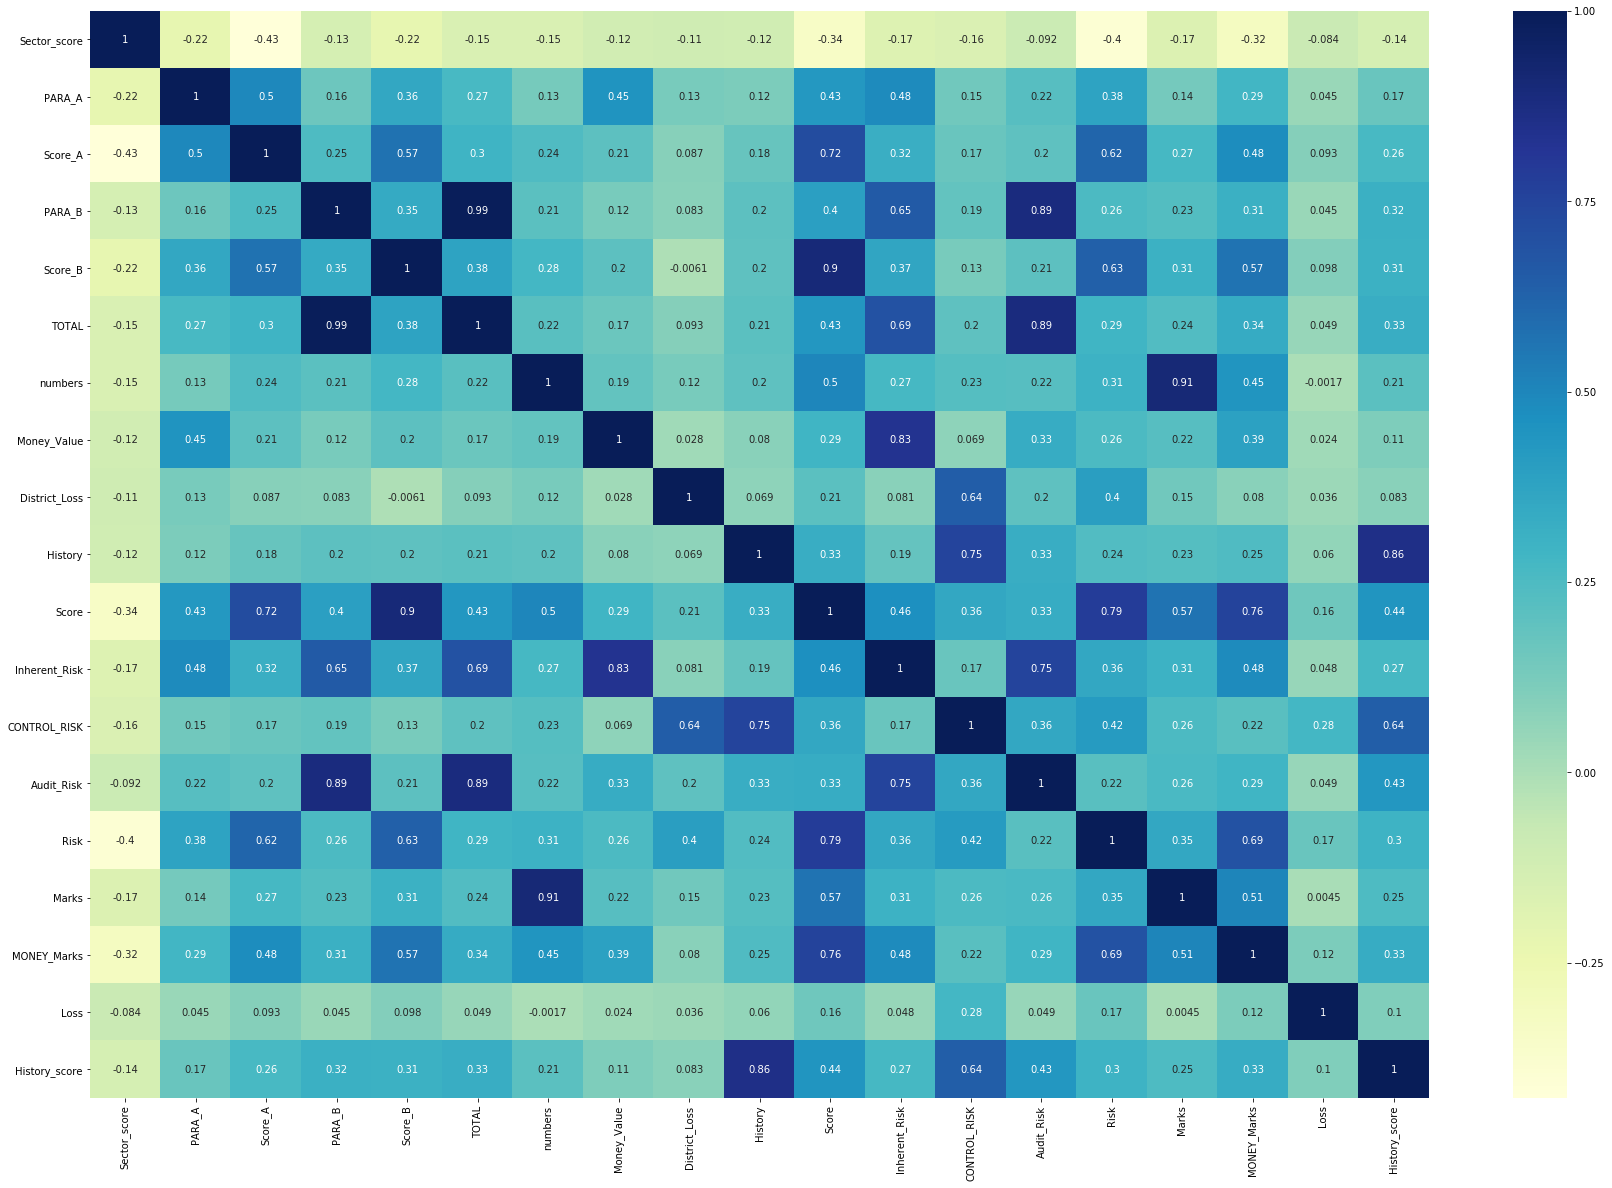

In [46]:
plt.figure(figsize=(30,20)) 
sns.heatmap(dataset.corr(), annot=True,  cmap="YlGnBu") 

    The heatmap details the correlation among all the variables. Based on the color we can understand how various variables are correlated with our depedent variable 

## Histogram distribution of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7778BB6D8>,
      dtype=object)

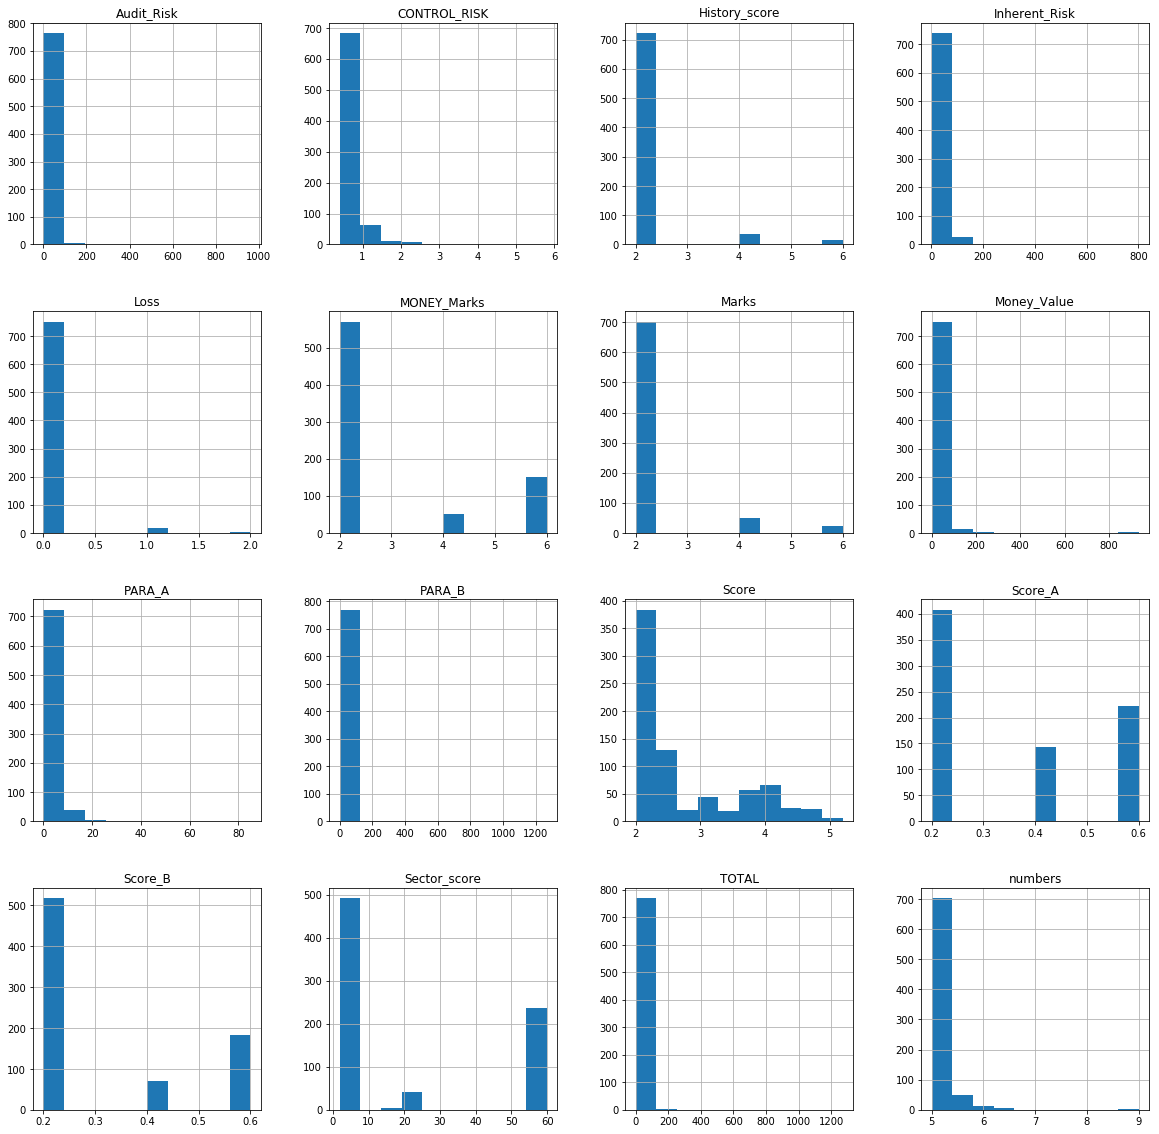

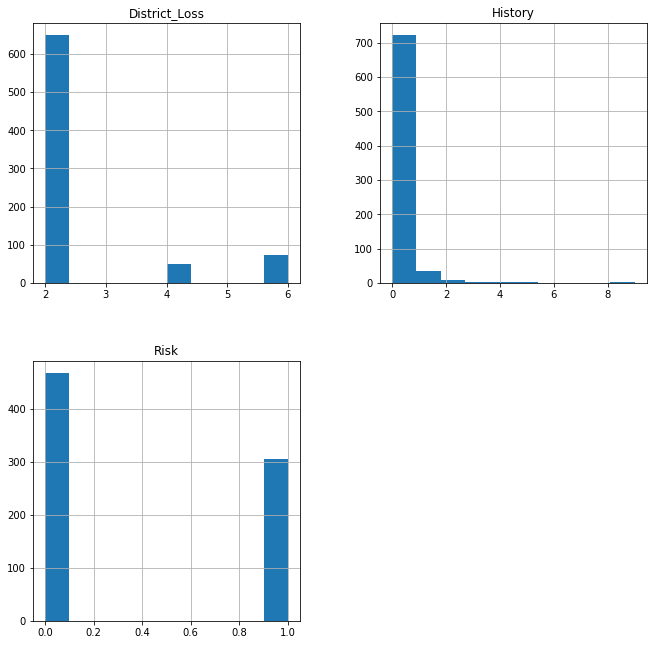

In [47]:
dataset[dataset.dtypes[(dataset.dtypes=="float")].index.values].hist(figsize=[20,20])
dataset[dataset.dtypes[(dataset.dtypes=="int64")].index.values].hist(figsize=[11,11])

    The plots indicate the distribution of the data. The distribution is helpful in understanding the structure of the data and deciding on the scaling that needs to be undertaken on the data. 
    The plotting of the variables indicate that the data is distributed in various scales. 
    There is a need to bring the variables on a similar scale, as not doing so will result in supperssion of weaker variables.
    
    We have also plotted few pairplots using seaborn, to understand how different variables are assoiated with each other and how they vary with the target variable for classification i.e. Risk


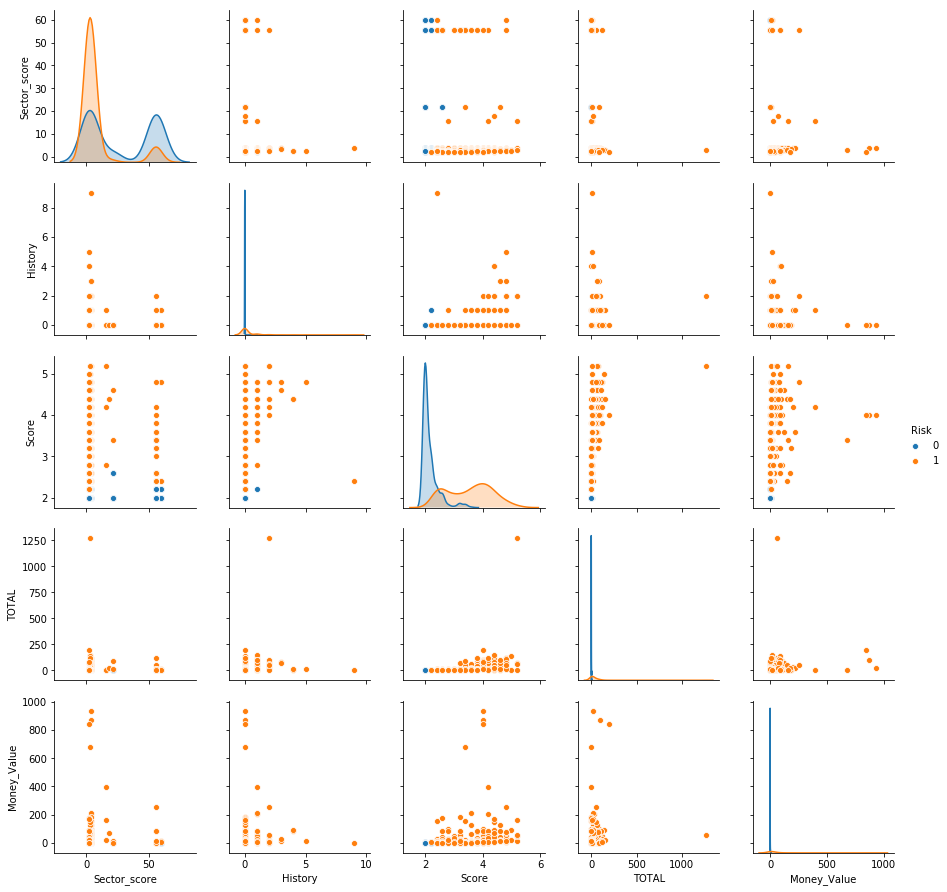

In [48]:
sns.pairplot(dataset, hue = 'Risk', vars = ['Sector_score','History','Score', 'TOTAL', 'Money_Value'])


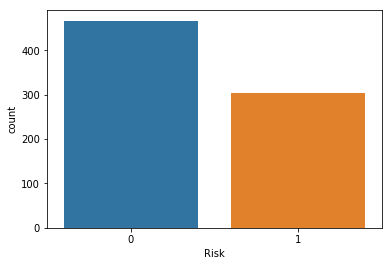

In [49]:
sns.countplot(dataset['Risk'], label = "Count") 

    We wanted to make sure that the data we are working with is not unbalanced, with the count of target variable, looks like we do not need to balance the dataset.

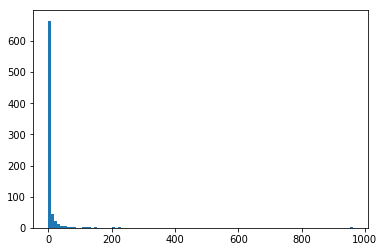

In [50]:
plt.hist(dataset['Audit_Risk'],bins=100)
plt.show()

    We can see a few outliers and we need to get rid of those, We have decided to drop values greater than 100 for Audit_Risk from our dataset to get rid of these outliers

In [51]:
dataset=dataset[dataset['Audit_Risk']<100]
X=dataset.drop(columns=['Audit_Risk','Risk'],axis=1)
y=dataset['Risk']

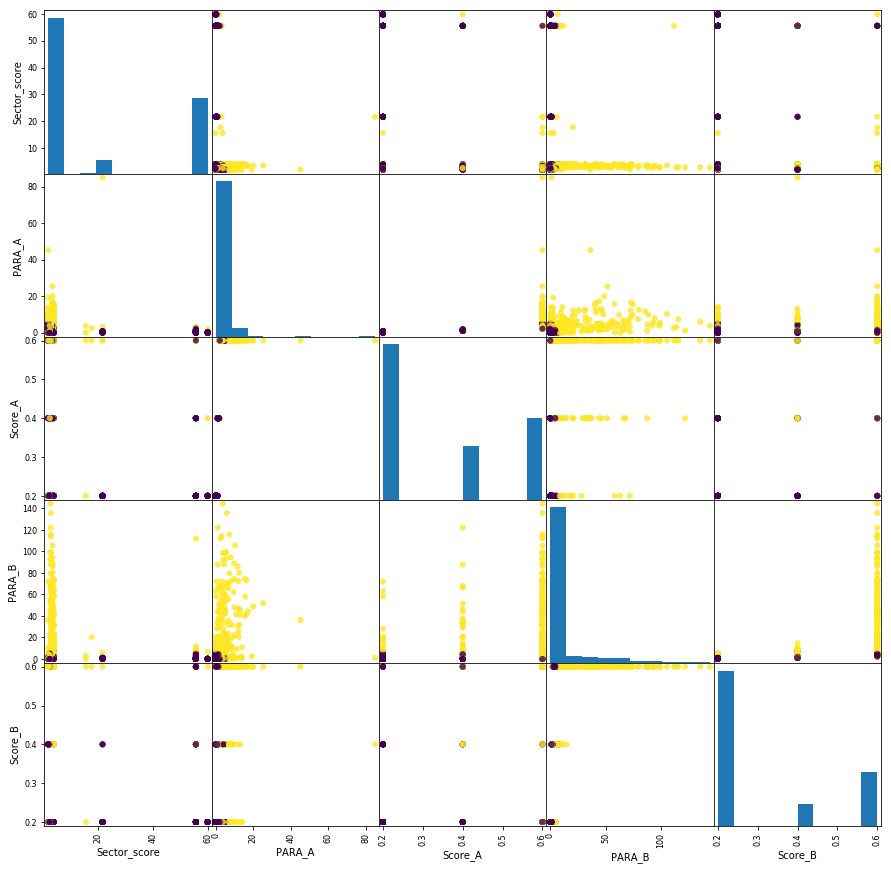

In [53]:
from pandas.plotting import scatter_matrix
attributes = X.columns.values[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')
plt.show()

## Step - 3 Model Training and Evaluation

## Classification Task
#### Splitting into train and test

In [52]:
X=dataset.drop(columns=['Audit_Risk','Risk'],axis=1)
y=dataset['Risk']

In [55]:
X.head()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Marks,MONEY_Marks,Loss,History_score
0,3.89,4.18,0.6,2.50,0.2,6.68,5.0,3.38,2,0,2.4,8.574,0.4,2.0,2.0,0.0,2.0
1,3.89,0.00,0.2,4.83,0.2,4.83,5.0,0.94,2,0,2.0,2.554,0.4,2.0,2.0,0.0,2.0
2,3.89,0.51,0.2,0.23,0.2,0.74,5.0,0.00,2,0,2.0,1.548,0.4,2.0,2.0,0.0,2.0
3,3.89,0.00,0.2,10.80,0.6,10.80,6.0,11.75,2,0,4.4,17.530,0.4,6.0,6.0,0.0,2.0
4,3.89,0.00,0.2,0.08,0.2,0.08,5.0,0.00,2,0,2.0,1.416,0.4,2.0,2.0,0.0,2.0


In [54]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Risk, dtype: int64

In [56]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [57]:
X_train_unscaled.head()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Marks,MONEY_Marks,Loss,History_score
283,2.37,3.61,0.6,2.130,0.6,5.740,5.0,5.41,2,2,4.4,8.6080,2.0,2.0,4.0,1.0,6.0
459,1.85,7.07,0.6,0.720,0.2,7.790,5.0,0.00,2,0,2.4,5.7860,0.4,2.0,2.0,0.0,2.0
336,2.37,0.01,0.2,0.007,0.2,0.017,5.0,0.00,2,0,2.0,1.4034,0.4,2.0,2.0,0.0,2.0
644,55.57,0.49,0.2,0.000,0.2,0.490,5.0,0.00,2,0,2.0,1.4980,0.4,2.0,2.0,0.0,2.0
184,3.41,0.43,0.2,0.000,0.2,0.430,5.0,0.00,2,0,2.0,1.4860,0.4,2.0,2.0,0.0,2.0


In [58]:
X_train_unscaled.shape

(611, 17)

In [59]:
y_train.shape

(611,)

### Scaling the Data
- Scaling the data using MinMaxScaler
- MinMax Scalar works well with Classification 

(-0.2, 1.2)

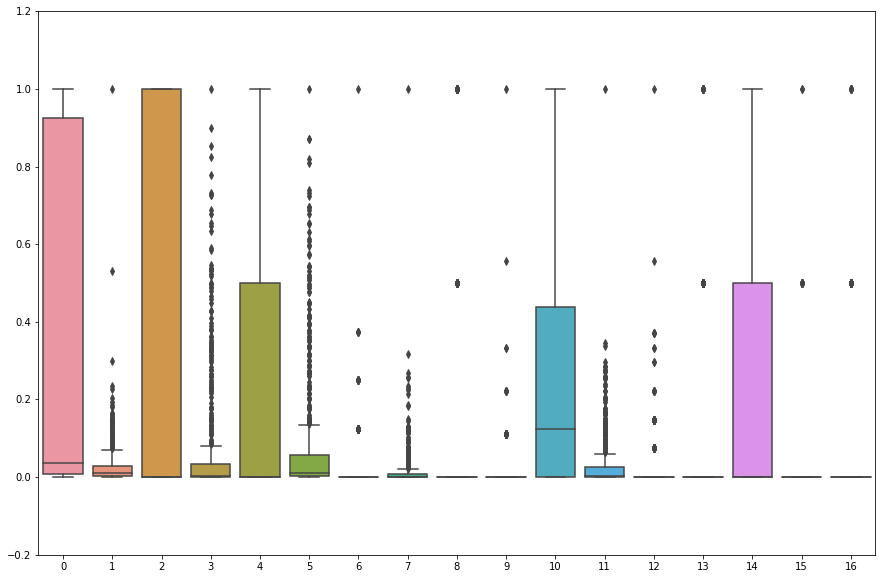

In [60]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train_unscaled)
X_test=scaler.transform(X_test_unscaled)

x2=pd.DataFrame(X_train)
plt.figure(figsize=(15,10))
sns.boxplot(data = x2)
plt.ylim(-0.2,1.2)

##  Evaluation Strategy 
- Our Evaluation Strategy is going to be find the model with train and test score as close as possible with a good <b>Recall</b> and <b>F1 score</b> because of the following reasons

- We are here assessing whether a firm is at Risk or Not. so we do not want to misclassify a firm which is at Risk. Say If firm A is at Risk (1) but we classify it as Not Risk (0) i.e. <b>False Negative</b> then our model is commiting Type II error which can cause the company huge financial loss. So taking this into account we are stressing on a good Precision Score. 

- We are not much worried about classifying a firm which is not  a risk (0) as at Risk (1) i.e. <b>False Positive </b>, because by doing that we are not causing much harm to the company, though additional cost will be there to evaluate that particular firm which has been misclassified to be at Risk, but it is fine as long as we are not classifying any False Negatives and False positives are limited

- <b>Recall </b> measures how many of the positive samples are captured by the positive predictions. Recall is used as performance metric when we need to identify all positive samples, that is, when it is important to avoid false negatives

- But on the other hand if the model is classifying everything at risk (1) i.e. positive then our Recall score will be equal to 1, which will be misleading. So we will also be looking for a good F1 score here.

- There is a trade-off between optimizing recall and optimizing precision. We can trivially obtain a perfect recall if we predict all samples to belong to the positive class— there will be no false negatives, and no true negatives either. However, predicting all samples as positive will result in many false positives, and therefore the precision will be very low. On the other hand, if we find a model that predicts only the single data point it is most sure about as positive and the rest as negative, then precision will be perfect (assuming this data point is in fact positive), but recall will be very bad.

- So, while precision and recall are very important measures, looking at only one of them will not provide us with the full picture. 
- One way to summarize them is the f-score which is with the harmonic mean of precision and recall:
- - F = 2*(precision*recall)/(precision+recall)

- As it takes precision and recall into account, it can be a better measure than accuracy in binary classification.

<b>So we chose to go for Recall and F1 score as our evaulation metrics</b>

<font color=violet>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

<font color=coral size=6> Applying different Classification models</font>

### 1. Apply voting classifiers - two with soft voting</b>

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [148]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C=1,probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)


from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, clf.score(X_test, y_test))

LogisticRegression 0.9607843137254902
KNeighborsClassifier 0.934640522875817
SVC 0.9673202614379085
VotingClassifier 0.9607843137254902


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.96      0.92      0.94        50

   micro avg       0.96      0.96      0.96       153
   macro avg       0.96      0.95      0.95       153
weighted avg       0.96      0.96      0.96       153

Precision Score: 0.9583333333333334
Recall Score: 0.92
F1 Score: 0.9387755102040817


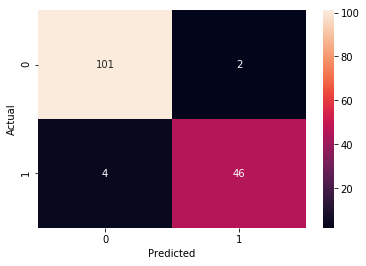

In [150]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score

y_pred=voting_clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

### 2. Apply voting classifiers - with hard voting

In [151]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C=10,probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, clf.score(X_test, y_test))

LogisticRegression 0.9607843137254902
KNeighborsClassifier 0.934640522875817
SVC 0.9607843137254902
VotingClassifier 0.9607843137254902


Results are almost same with hard and soft voting when used in Logistic regression, Knn and SVM classifier

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.96      0.92      0.94        50

   micro avg       0.96      0.96      0.96       153
   macro avg       0.96      0.95      0.95       153
weighted avg       0.96      0.96      0.96       153

Precision Score: 0.9583333333333334
Recall Score: 0.92
F1 Score: 0.9387755102040817


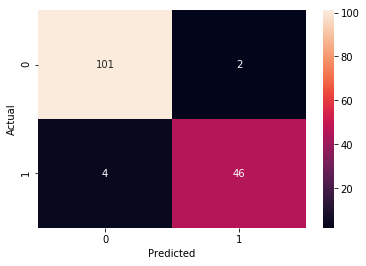

In [152]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score

y_pred=voting_clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

### 3. Bagging




- <font color=maroon size=4> Bagging with Decision Tree </font>

 <font color=tomato size=3>1. Training on a single Decision Tree and then using Aggregate Bootstraping</font>


In [153]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
bag_reg = BaggingClassifier(dt, n_estimators=500, max_samples=200, bootstrap=True, random_state=0,oob_score=True)

# 500 patches out of the dataset
# max_samples =100, number of samples in a classifier
# bootstrap = bagging/pasting ; =True is bagging i.e. with replacement select the samples
# oob: the left out sample score
# On an average only 63% of the data is selected in total

bag_reg.fit(X_train, y_train)
dt.fit(X_train,y_train)
y_pred = bag_reg.predict(X_test)

print('Model-01 using Decision Tree for Bagging\n')
print('Train score with bagging: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with bagging: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score decision Tree: {:.2f}'.format(dt.score(X_train, y_train)))
print('Test score decision Tree: {:.2f}\n'.format(dt.score(X_test, y_test)))
print('Out of Bag score: {:.2f}'.format(bag_reg.oob_score_))

Model-01 using Decision Tree for Bagging

Train score with bagging: 1.00
Test score with bagging: 0.99

Train score decision Tree: 1.00
Test score decision Tree: 0.99

Out of Bag score: 0.99


- With Decision Tree , we are getting a Train score of 1 and a test score 0f 1, the model is overfitting the data
- Using Bagging, we are getting Train score 0f 1 and test score of 0.99 which is better than what we got with a single decision tree

<font color=tomato size=3> 2. Finding best parameteters for Bagging of Decision Tree Regressor using GridSearch Cross Validation </font>

In [154]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=0),bootstrap=True, oob_score=True, random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 100, 'n_estimators': 100}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

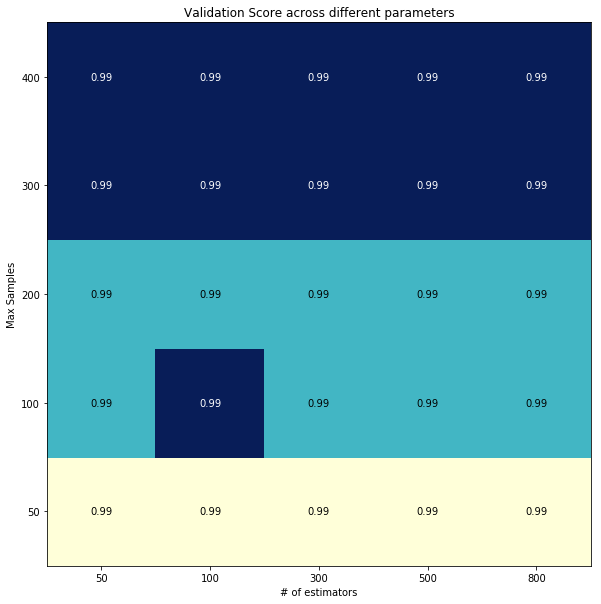

In [155]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="YlGnBu") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

In [156]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

Train score: 0.9934533551554828
Test score: 0.9869281045751634


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       103
           1       0.98      0.98      0.98        50

   micro avg       0.99      0.99      0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153

Precision Score: 0.98
Recall Score: 0.98
F1 Score: 0.98


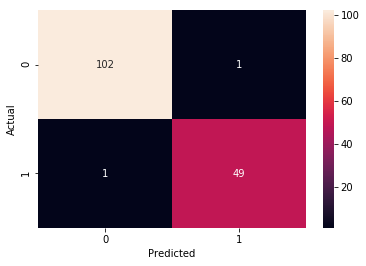

In [157]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score

y_pred=gs.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

In [158]:
from  matplotlib.colors  import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

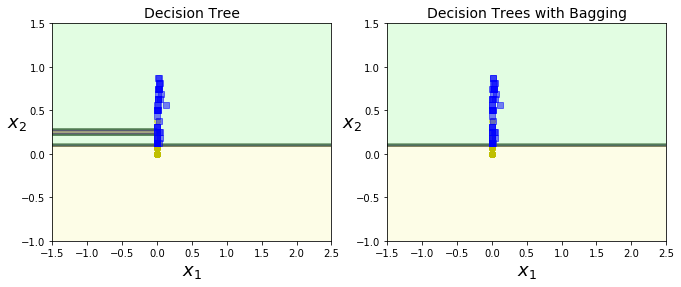

In [159]:
X_b = X_train[:100,[7,10]]
y_b = y_train[:100]

dt = DecisionTreeClassifier(random_state=0)
bag_reg = BaggingClassifier(dt, n_estimators=500, bootstrap=True, random_state=0,oob_score=True)

bag_reg.fit(X_b, y_b)
dt.fit(X_b,y_b)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(dt, X_b, y_b)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_reg, X_b, y_b)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

- <font color=maroon size=4> Bagging with KNN </font>

 <font color=tomato size=3>1. Training on a single KNN and then using Aggregate Bootstraping</font>


In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)
bag_reg = BaggingClassifier(knn, n_estimators=500, bootstrap=True, random_state=0,oob_score=True)

bag_reg.fit(X_train, y_train)
knn.fit(X_train,y_train)

print('Model-02 using KNN for Bagging\n')
print('Train score with bagging: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with bagging: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score KNN: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test score KNN: {:.2f}\n'.format(knn.score(X_test, y_test)))
print('Out of Bag score: {:.2f}'.format(bag_reg.oob_score_))

Model-02 using KNN for Bagging

Train score with bagging: 0.99
Test score with bagging: 0.97

Train score KNN: 0.98
Test score KNN: 0.97

Out of Bag score: 0.98


- With KNN, we are getting a Train score of 0.98 and a test score 0f 0.97
- Using Bagging, we are getting Train score of 0.98 and test score of 0.97, looks like model already has very less variance

<font color=tomato size=3> 2. Finding best parameteters for Bagging of KNN Regressor using GridSearch Cross Validation </font>

In [161]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingClassifier(KNeighborsClassifier(3),bootstrap=True, oob_score=True, random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 300, 'n_estimators': 50}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

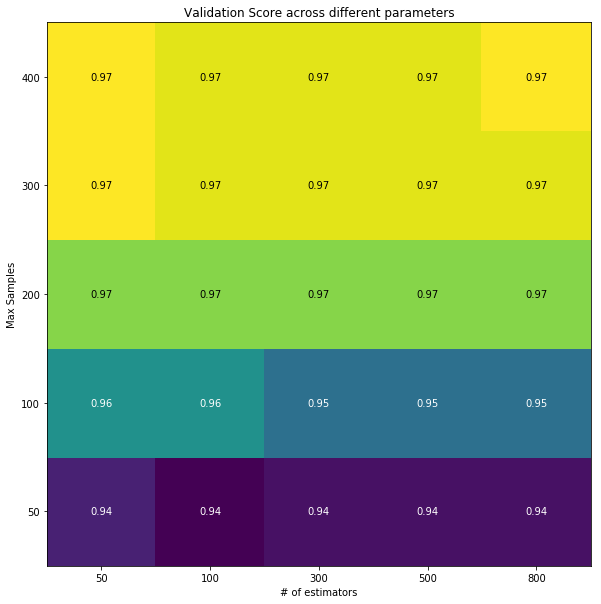

In [163]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       103
           1       0.96      0.90      0.93        50

   micro avg       0.95      0.95      0.95       153
   macro avg       0.96      0.94      0.95       153
weighted avg       0.95      0.95      0.95       153

Precision Score: 0.9574468085106383
Recall Score: 0.9
F1 Score: 0.9278350515463918


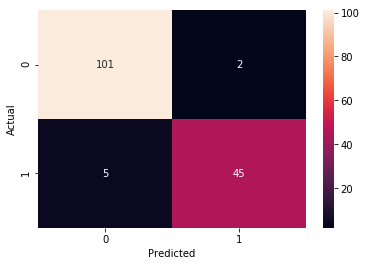

In [164]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score

y_pred=gs.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.9803600654664485
Test score: 0.954248366013072


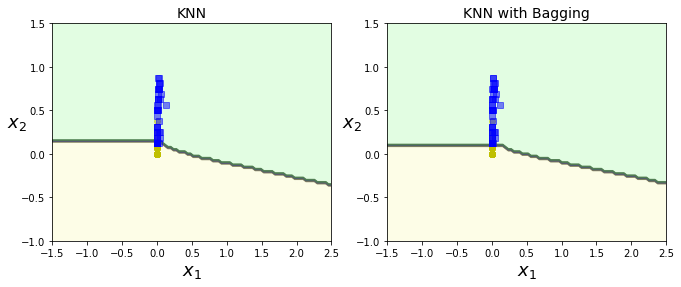

In [165]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,[7,10]]
y_b = y_train[:100]

knn = KNeighborsClassifier(3)
bag_reg = BaggingClassifier(knn, n_estimators=500, bootstrap=True,oob_score=True)

bag_reg.fit(X_b, y_b)
knn.fit(X_b,y_b)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(knn, X_b, y_b)
plt.title("KNN", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_reg, X_b, y_b)
plt.title("KNN with Bagging", fontsize=14)
plt.show()


<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

### 4. Pasting

- <font color=green size=4> Pasting with Decision Tree </font>

 <font color=tomato size=3>1. Training on a single Decision Tree and then using Aggregate Bagging</font>

In [166]:
dt = DecisionTreeClassifier(random_state=0)
bag_reg = BaggingClassifier(dt, n_estimators=500, max_samples=200, bootstrap=False, random_state=0)

bag_reg.fit(X_train, y_train)
dt.fit(X_train,y_train)
y_pred = bag_reg.predict(X_test)

print('Model-03 using Decision Tree for Pasting\n')
print('Train score with pasting: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with pasting: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score decision Tree: {:.2f}'.format(dt.score(X_train, y_train)))
print('Test score decision Tree: {:.2f}\n'.format(dt.score(X_test, y_test)))

Model-03 using Decision Tree for Pasting

Train score with pasting: 1.00
Test score with pasting: 0.99

Train score decision Tree: 1.00
Test score decision Tree: 0.99



- With single Decision tree, we are getting a Train score of 1 and a test score 0f 0.99
- Using Pasting, we are getting Train score of 1 and test score of 1 

<font color=tomato size=3> 2. Finding best parameteters for Pasting of Decision Tree Regressor using GridSearch Cross Validation </font>

In [167]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=0),bootstrap=False,random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 400, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       103
           1       0.98      0.98      0.98        50

   micro avg       0.99      0.99      0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153

Precision Score: 0.98
Recall Score: 0.98
F1 Score: 0.98


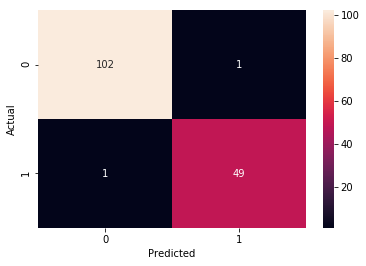

In [168]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score

y_pred=gs.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

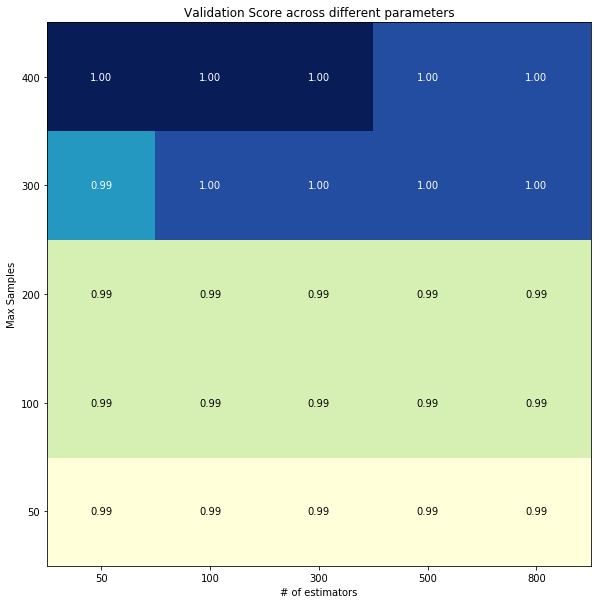

In [169]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="YlGnBu") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 1.0
Test score: 0.9869281045751634


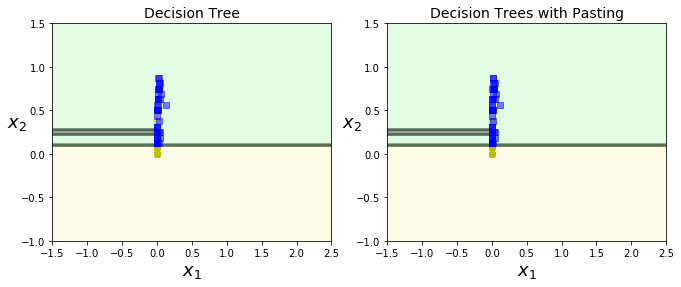

In [170]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))


X_b = X_train[:100,[7,10]]
y_b = y_train[:100]

dt = DecisionTreeClassifier(random_state=0)
bag_reg = BaggingClassifier(dt, n_estimators=500, bootstrap=False, random_state=0)

bag_reg.fit(X_b, y_b)
dt.fit(X_b,y_b)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(dt, X_b, y_b)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_reg, X_b, y_b)
plt.title("Decision Trees with Pasting", fontsize=14)
plt.show()


<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

- <font color=green size=4> Pasting with KNN </font>

- <font color=tomato size=3>1. Training on a single KNN and then using Pasting</font>


In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)
bag_reg = BaggingClassifier(knn, n_estimators=500, bootstrap=False, random_state=0)

bag_reg.fit(X_train, y_train)
knn.fit(X_train,y_train)

print('Model-04 using KNN for Pasting\n')
print('Train score with pasting: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with pasting: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score KNN: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test score KNN: {:.2f}\n'.format(knn.score(X_test, y_test)))

Model-04 using KNN for Pasting

Train score with pasting: 0.98
Test score with pasting: 0.97

Train score KNN: 0.98
Test score KNN: 0.97



- With KNN, we are getting a Train score of 0.98 and a test score 0f 0.97
- Using Pasting, we are getting Train score of 0.98 and test score of 0.97, looks like model already has very less variance

<font color=tomato size=3> 2. Finding best parameteters for Pasting of KNN Regressor using GridSearch Cross Validation </font>

In [172]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingClassifier(KNeighborsClassifier(3),bootstrap=False, random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 400, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.96      0.92      0.94        50

   micro avg       0.96      0.96      0.96       153
   macro avg       0.96      0.95      0.95       153
weighted avg       0.96      0.96      0.96       153

Precision Score: 0.9583333333333334
Recall Score: 0.92
F1 Score: 0.9387755102040817


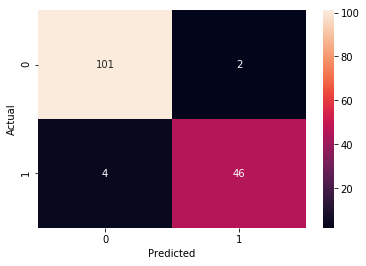

In [173]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score

y_pred=gs.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

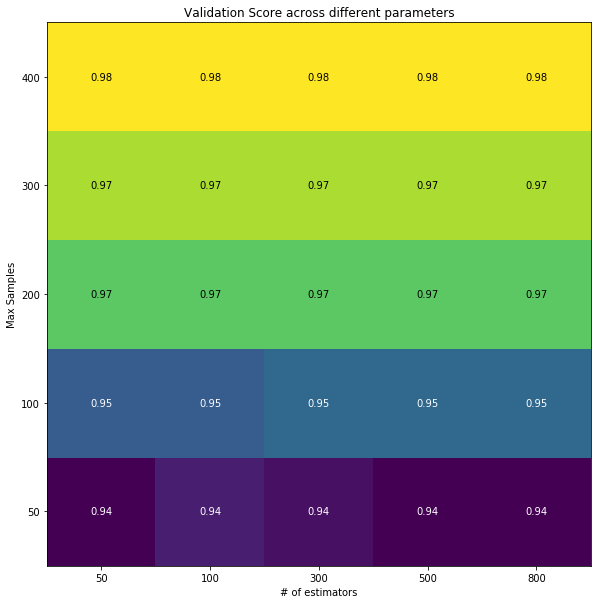

In [174]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.9803600654664485
Test score: 0.9607843137254902


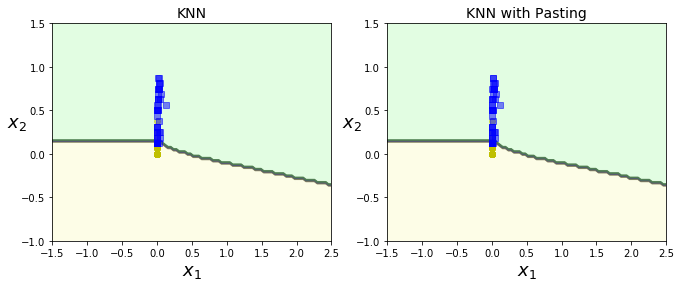

In [175]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,[7,10]]
y_b = y_train[:100]

knn = KNeighborsClassifier(3)
bag_reg = BaggingClassifier(knn, n_estimators=500, bootstrap=False)

bag_reg.fit(X_b, y_b)
knn.fit(X_b,y_b)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(knn, X_b, y_b)
plt.title("KNN", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_reg, X_b, y_b)
plt.title("KNN with Pasting", fontsize=14)
plt.show()


<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

### 5. Adaboost


- <font color=purple size=4> Adaboost with Decision Tree </font>


<font color=tomato size=3>1. Training on a single Decision Tree and then using Adaboost</font>

In [176]:
from sklearn.ensemble import AdaBoostClassifier

ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, learning_rate=0.3, random_state=0)
ada_reg.fit(X_train, y_train)

dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
print('Train score with Adaboost: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(ada_reg.score(X_test, y_test)))
print('Train score with Decision Tree: {:.2f}'.format(dt.score(X_train, y_train)))
print('Test score with Decision Tree: {:.2f}'.format(dt.score(X_test, y_test)))

Train score with Adaboost: 1.00
Test score with Adaboost: 0.99

Train score with Decision Tree: 1.00
Test score with Decision Tree: 0.99


- With a weak learner Decision Tree with maxiumum depth 3, we are getting Train score of 1 and test score of 0.99
- When put into adaboost regressor, it is more efficient and able to reduce bias/performance, getting train score of 0.99 and a test score 0f 0.99

<font color=tomato size=3> 2. Finding best parameteters Adaboost using GridSearch Cross Validation </font>

In [177]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,200,300,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'learning_rate': 0.3, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       103
           1       1.00      0.98      0.99        50

   micro avg       0.99      0.99      0.99       153
   macro avg       1.00      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153

Precision Score: 1.0
Recall Score: 0.98
F1 Score: 0.98989898989899


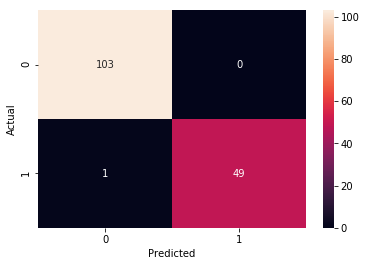

In [178]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score

y_pred=gs.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

<font color=tomato size=3> 3. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 1.0
Test score: 0.9934640522875817


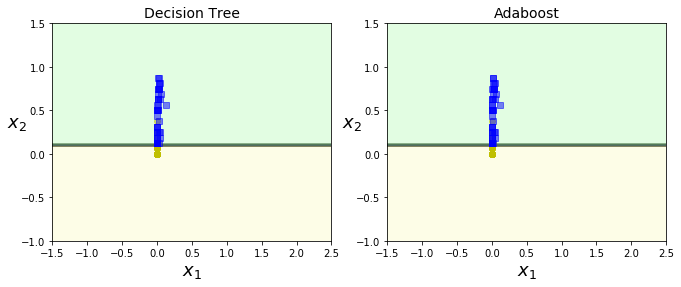

In [179]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))


X_b = X_train[:100,[7,10]]
y_b = y_train[:100]

ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=50, learning_rate=0.3, random_state=0)
ada_reg.fit(X_b, y_b)
dt.fit(X_b,y_b)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(dt, X_b, y_b)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(ada_reg, X_b, y_b)
plt.title("Adaboost", fontsize=14)
plt.show()


<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

- <font color=purple size=4> Adaboost with Linear SVC </font>

<font color=tomato size=3>1. Training on Linear SVC and then using Adaboost</font>

In [180]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

ada_reg = AdaBoostClassifier(LinearSVC(), n_estimators=100, learning_rate=0.1, random_state=0,  algorithm="SAMME")
ada_reg.fit(X_train, y_train)

svr=LinearSVC(random_state=0)
svr.fit(X_train, y_train)
print('Train score with Adaboost: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(ada_reg.score(X_test, y_test)))
print('Train score with SVR: {:.2f}'.format(svr.score(X_train, y_train)))
print('Test score with SVR: {:.2f}'.format(svr.score(X_test, y_test)))

Train score with Adaboost: 0.97
Test score with Adaboost: 0.97

Train score with SVR: 0.97
Test score with SVR: 0.97


- Adaboost is giving us better results than a single Linear SVC, let's see if the performance can be improved by fine tuning the parameters

<font color=tomato size=3> 2. Finding best parameteters Adaboost using GridSearch Cross Validation </font>

In [181]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,200,300,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(AdaBoostClassifier(LinearSVC(), random_state=0, algorithm="SAMME"),param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'learning_rate': 0.01, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       103
           1       0.94      0.96      0.95        50

   micro avg       0.97      0.97      0.97       153
   macro avg       0.96      0.97      0.96       153
weighted avg       0.97      0.97      0.97       153

Precision Score: 0.9411764705882353
Recall Score: 0.96
F1 Score: 0.9504950495049505


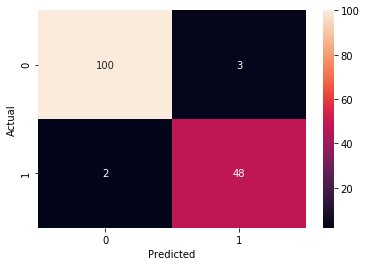

In [182]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score

y_pred=gs.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

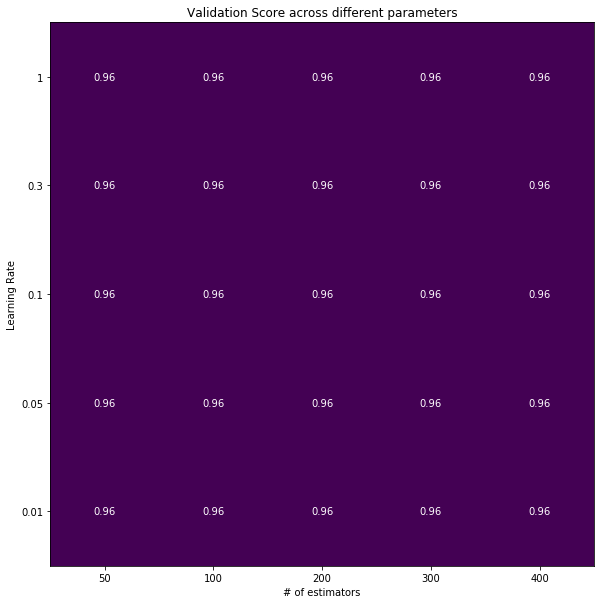

In [183]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Learning Rate',
                      yticklabels=param_dist['learning_rate'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.9705400981996727
Test score: 0.9673202614379085


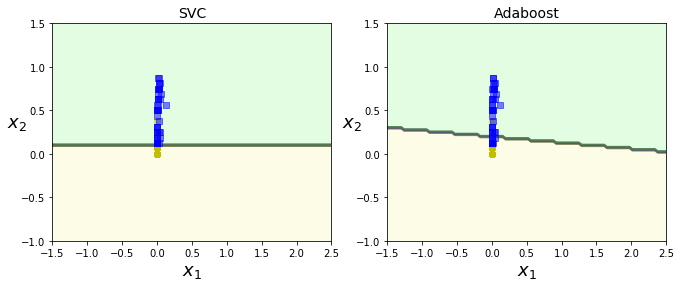

In [184]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))


X_b = X_train[:100,[7,10]]
y_b = y_train[:100]

ada_reg = AdaBoostClassifier(LinearSVC(), n_estimators=50, learning_rate=0.01, random_state=0, algorithm="SAMME")
ada_reg.fit(X_b, y_b)
svr.fit(X_b,y_b)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(dt, X_b, y_b)
plt.title("SVC", fontsize=14)
plt.subplot(122)
plot_decision_boundary(ada_reg, X_b, y_b)
plt.title("Adaboost", fontsize=14)
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

### 6. Gradient Boosting


<font color=tomato size=3>1. Training on Gradient Boosting algorithm</font>

In [185]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

print('Train score with Adaboost: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(gbrt.score(X_test, y_test)))

Train score with Adaboost: 1.00
Test score with Adaboost: 0.98



- Adjusting for different max_depth=3

In [186]:
gbrt = GradientBoostingClassifier(max_depth=3, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

print('Train score with Adaboost: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(gbrt.score(X_test, y_test)))

Train score with Adaboost: 1.00
Test score with Adaboost: 0.99



<font color=tomato size=3> 2. Finding best parameteters using GridSearch Cross Validation </font>

In [187]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [3,10,100,200,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(GradientBoostingClassifier(random_state=42,max_depth=3),param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'learning_rate': 0.1, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       103
           1       0.98      0.98      0.98        50

   micro avg       0.99      0.99      0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153

Precision Score: 0.98
Recall Score: 0.98
F1 Score: 0.98


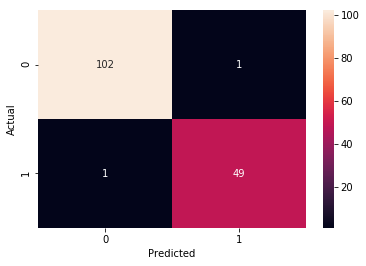

In [188]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score

y_pred=gs.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

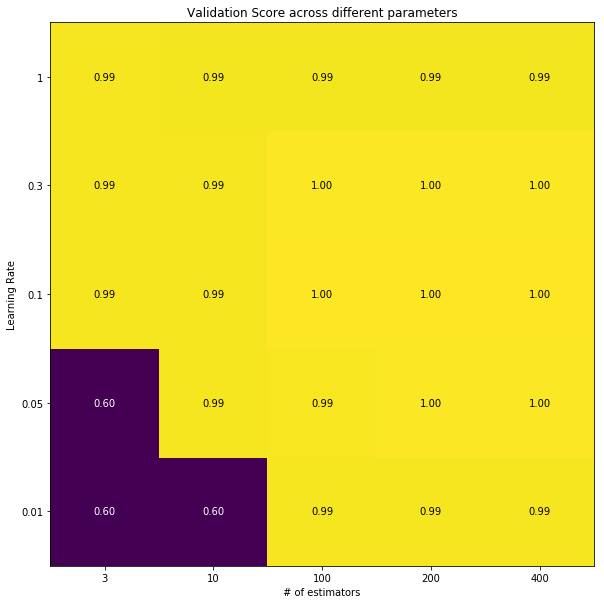

In [189]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Learning Rate',
                      yticklabels=param_dist['learning_rate'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

### 7. Using PCA

In [96]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
#Making principal components that explain 95% of the variance in the data

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [97]:
X_train.shape

(611, 7)

In [98]:
print('Variance Explained by each Principal Component: \n{}\n\n'.format(pca.explained_variance_))
print('Percentage variance Explained by each Principal Component in the data:\n{}\n\n'.format(pca.explained_variance_ratio_))
print('Number of principal Components: {}'.format(pca.n_components_))

Variance Explained by each Principal Component: 
[0.52075824 0.1527477  0.0981398  0.09563592 0.06702868 0.03174479
 0.02806267]


Percentage variance Explained by each Principal Component in the data:
[0.50352498 0.14769288 0.0948921  0.09247108 0.06481052 0.03069427
 0.02713401]


Number of principal Components: 7


# PCA

# i) KNN Classification

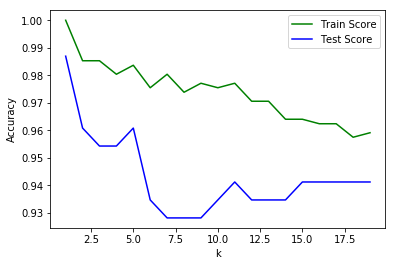

In [99]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

- K=1 overfits the model, k=5 looks good
- Let's see how KNN fits the data at k=1 and k=5

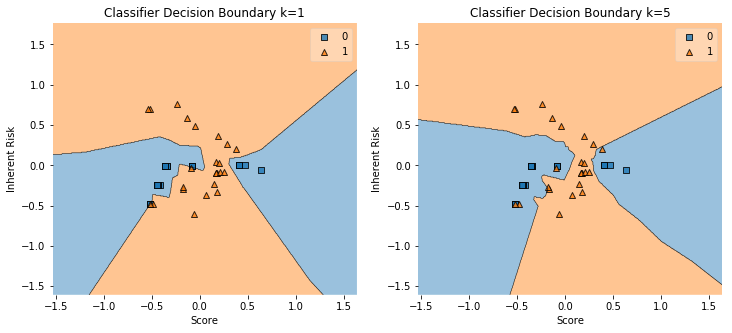

In [102]:
from mlxtend.plotting import plot_decision_regions

X_b = X_train[100:150,[1,2]]
y_b = y_train[100:150]

plt.figure(figsize=(12,5))

for i,j in zip((1,5),(1,2)):
    knn = KNeighborsClassifier(i)
    knn.fit(X_b, y_b) 
    plt.subplot(1,2,j)
    plot_decision_regions(X_b, np.array(y_b), clf = knn)
    plt.xlabel('Score')
    plt.ylabel('Inherent Risk')
    plt.title('Classifier Decision Boundary k={}'.format(i))

Train Score: 0.983633387888707
Test Score : 0.9607843137254902


Text(33.0, 0.5, 'Actual')

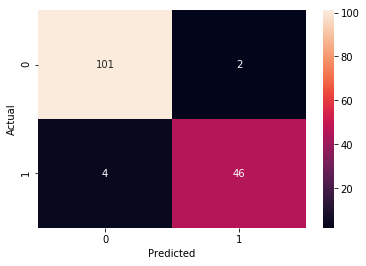

In [103]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score
knn=KNeighborsClassifier(5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print('Train Score: {}'.format(knn.score(X_train,y_train)))
print('Test Score : {}'.format(knn.score(X_test,y_test)))

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

- Though KNN is overfitting the trainig data, it has done a decent job is limiting the False Negatives

- So we have plotted the decision boundaries for various kernels 
- Out of these rbf kernel is giving us the best results

In [104]:
print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.96      0.92      0.94        50

   micro avg       0.96      0.96      0.96       153
   macro avg       0.96      0.95      0.95       153
weighted avg       0.96      0.96      0.96       153

Precision Score: 0.9583333333333334
Recall Score: 0.92
F1 Score: 0.9387755102040817


## ii) Logistic Regression

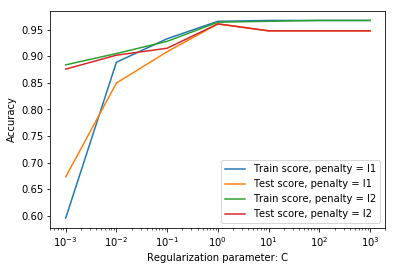

In [105]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

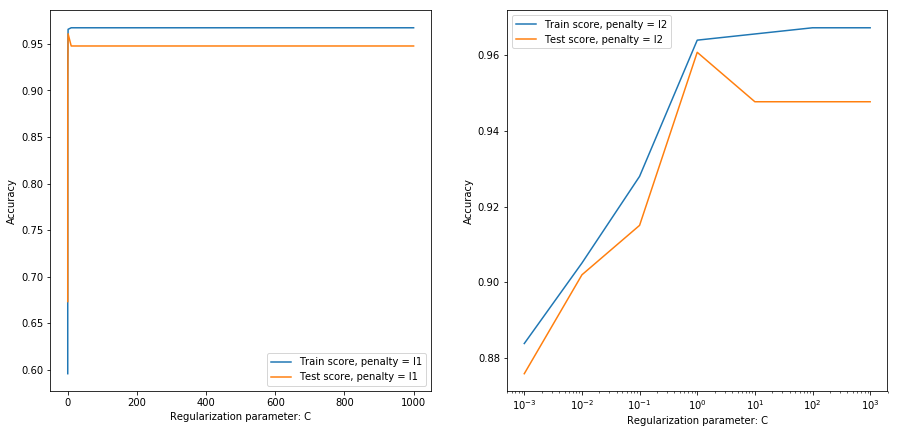

In [106]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

Train Score 0.967266775777414
Test Score 0.9477124183006536


Text(0.5, 1.0, 'Classifier Decision Boundary')

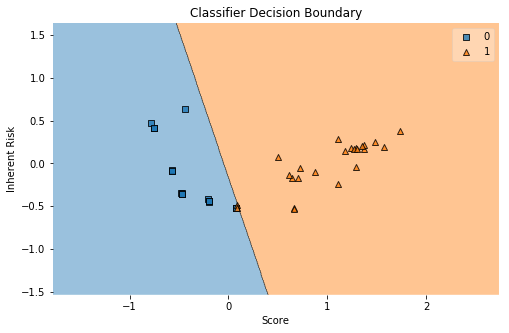

In [107]:
classifier = LogisticRegression(C=1000,penalty='l2')
classifier.fit(X_train,y_train)
print('Train Score {}'.format(classifier.score(X_train,y_train)))
print('Test Score {}'.format(classifier.score(X_test,y_test)))

X_b = X_train[100:150,[0,1]]
y_b = y_train[100:150]

plt.figure(figsize=(8,5))
classifier = LogisticRegression(C=1000,penalty='l2')
classifier.fit(X_b, y_b) 
plot_decision_regions(X_b, np.array(y_b), clf = classifier)
plt.xlabel('Score')
plt.ylabel('Inherent Risk')
plt.title('Classifier Decision Boundary')

### Confusion Matrix and Classification Report

Text(33.0, 0.5, 'Actual')

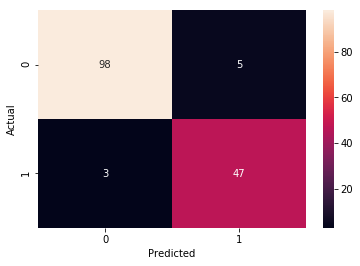

In [108]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score
classifier = LogisticRegression(C=1000,penalty='l2')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [109]:
print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       103
           1       0.90      0.94      0.92        50

   micro avg       0.95      0.95      0.95       153
   macro avg       0.94      0.95      0.94       153
weighted avg       0.95      0.95      0.95       153

Precision Score: 0.9038461538461539
Recall Score: 0.94
F1 Score: 0.9215686274509804


Logistic Regression with a lot of regularization has been able to do a decent job

### iii) Linear SVC

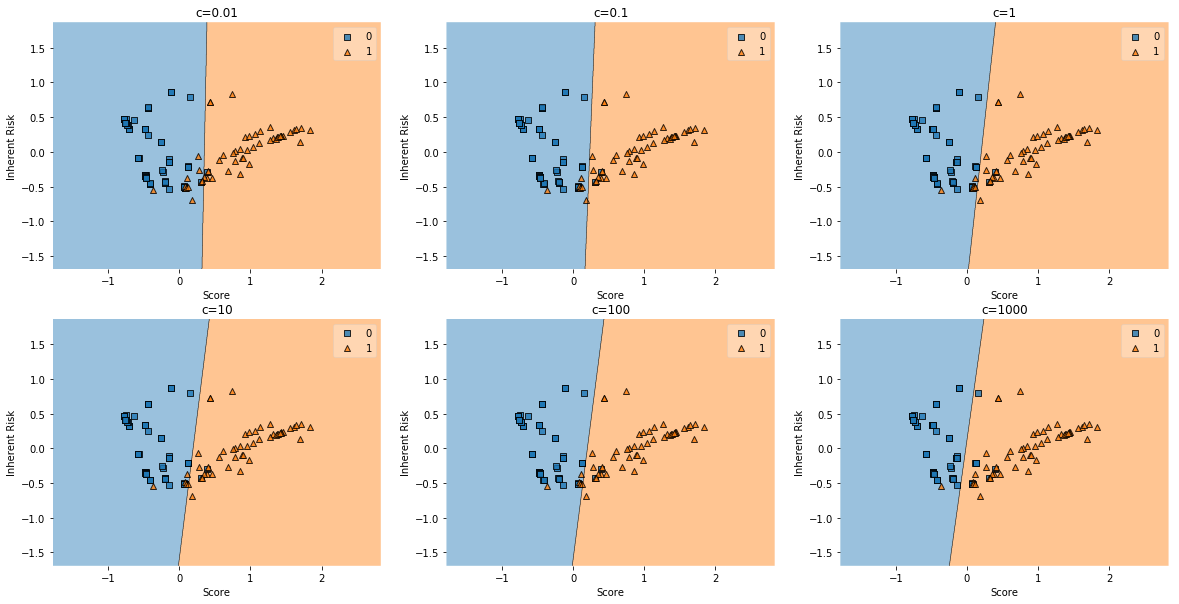

In [110]:
X_b = X_train[150:300,[0,1]]
y_b = y_train[150:300]

c_range = [0.01, 0.1, 1, 10, 100, 1000]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i,ax in zip(c_range,axes.ravel()):
    classifier=LinearSVC(C=i)
    classifier.fit(X_b, y_b) 
    plot_decision_regions(X_b, np.array(y_b), clf = classifier,ax=ax)
    ax.set_xlabel('Score')
    ax.set_ylabel('Inherent Risk')
    ax.set_title('c={}'.format(i))

### Confusion Matrix and Classification Report

Train Score: 0.9656301145662848
Test Score : 0.9477124183006536
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       103
           1       0.90      0.94      0.92        50

   micro avg       0.95      0.95      0.95       153
   macro avg       0.94      0.95      0.94       153
weighted avg       0.95      0.95      0.95       153

Precision Score: 0.9038461538461539
Recall Score: 0.94
F1 Score: 0.9215686274509804


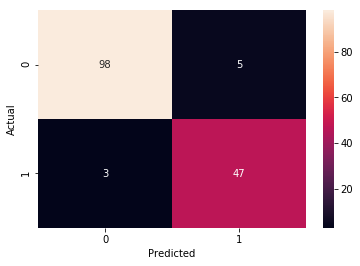

In [111]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score
model = LinearSVC(C=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


print('Train Score: {}'.format(model.score(X_train,y_train)))
print('Test Score : {}'.format(model.score(X_test,y_test)))

print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

## iv) Kernel SVM 

Train Score 0.9533333333333334 for linear kernel 
Test Score 0.9533333333333334 for linear kernel
Train Score 0.9533333333333334 for rbf kernel 
Test Score 0.9533333333333334 for rbf kernel
Train Score 0.8466666666666667 for poly kernel 
Test Score 0.8466666666666667 for poly kernel


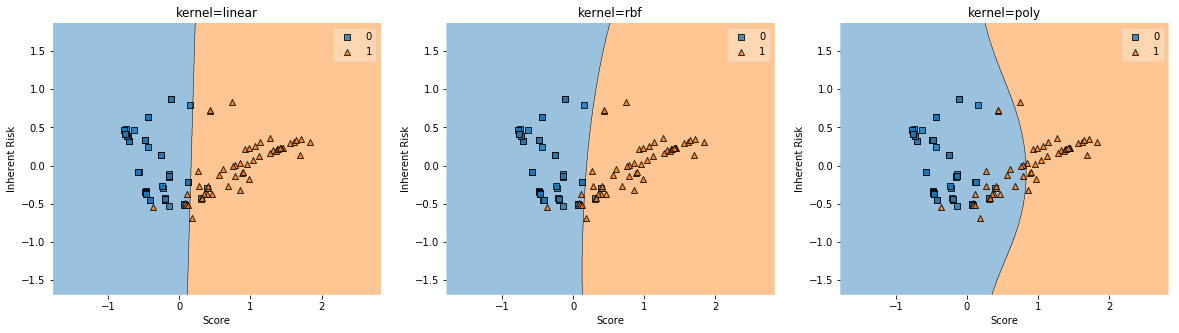

In [112]:
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.svm import SVC

X_b = X_train[150:300,[0,1]]
y_b = y_train[150:300]

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

kern=['linear','rbf','poly']

for i,ax in zip(kern,axes.ravel()):
    classifier=SVC(kernel=i)
    classifier.fit(X_b, y_b) 
    plot_decision_regions(X_b, np.array(y_b), clf = classifier,ax=ax)
    ax.set_xlabel('Score')
    ax.set_ylabel('Inherent Risk')
    ax.set_title('kernel={}'.format(i))
    print('Train Score {} for {} kernel '.format(classifier.score(X_b,y_b),i))
    print('Test Score {} for {} kernel'.format(classifier.score(X_b,y_b),i))


So we have plotted the decision boundaries for various kernels 
Out of these rbf kernel is giving us the best results

Let's visualize the results for the best parameters found and how the classfier is fitting the data for different values of C and gamma using rbf kernel

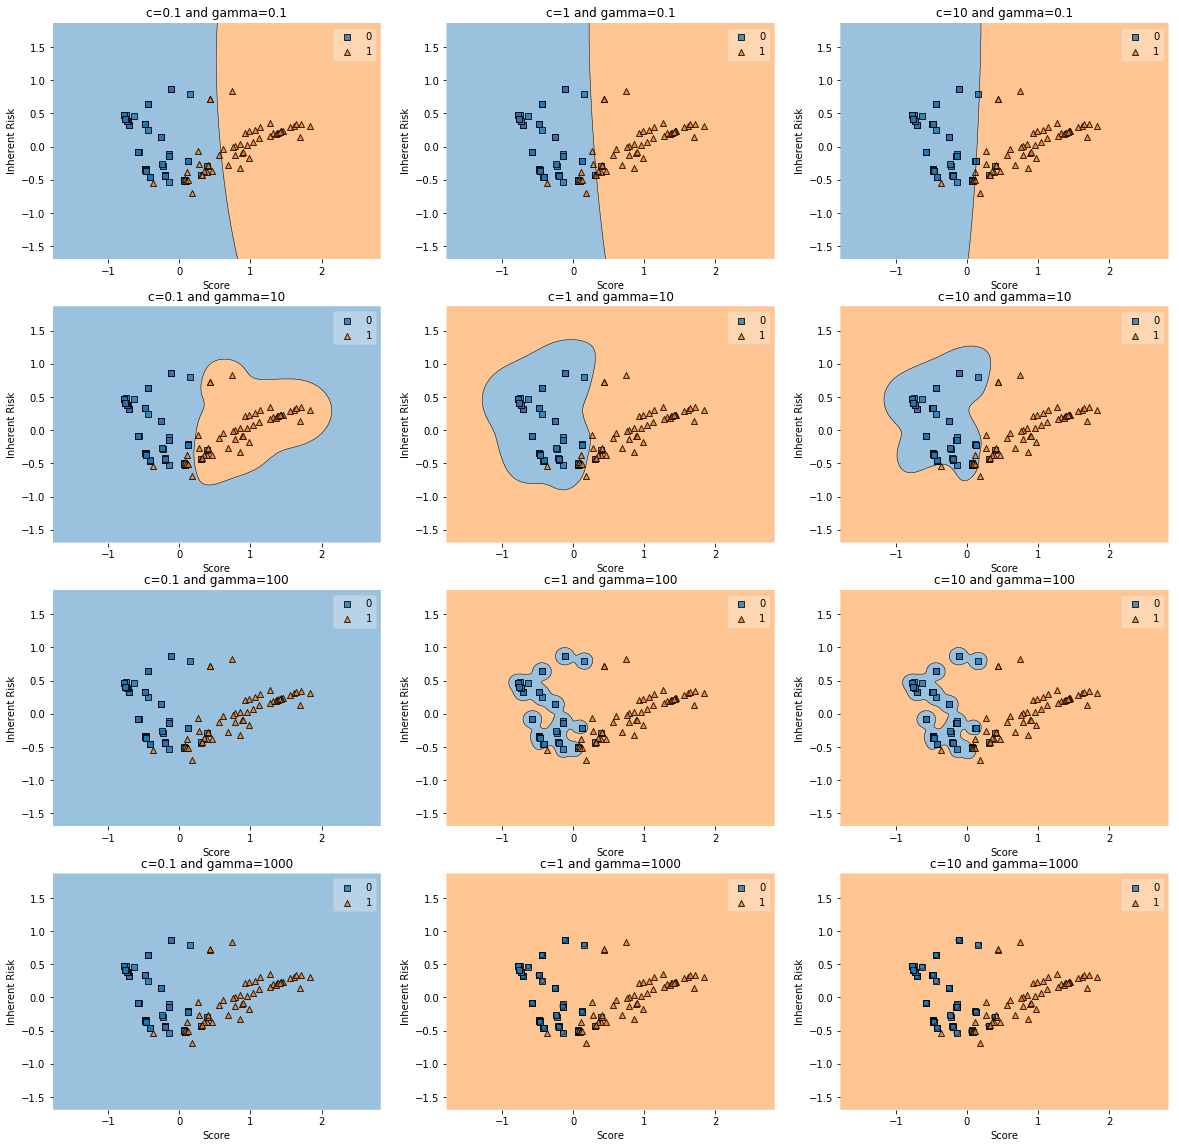

In [113]:
X_b = X_train[150:300,[0,1]]
y_b = y_train[150:300]

C=[0.1, 1, 10]
gamma=[0.1, 10, 100, 1000]

fig, axes = plt.subplots(4, 3, figsize=(20, 20))

for i,ax in zip(gamma,axes):
    for j,a in zip(C,ax):
        classifier=SVC(C=j,gamma=i,degree=1,kernel='rbf')
        classifier.fit(X_b, y_b) 
        plot_decision_regions(X_b, np.array(y_b), clf = classifier,ax=a)
        a.set_xlabel('Score')
        a.set_ylabel('Inherent Risk')
        a.set_title('c={} and gamma={}'.format(j,i))
        


### Confusion Matrix and Classification Report

Train Score: 0.967266775777414
Test Score : 0.9607843137254902


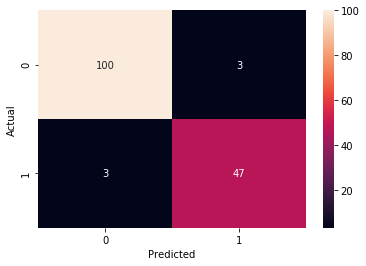

In [114]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score
model =SVC(C=1,gamma=1000,degree=1,kernel='poly')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('Train Score: {}'.format(model.score(X_train,y_train)))
print('Test Score : {}'.format(model.score(X_test,y_test)))

# v) Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
dtre = DecisionTreeClassifier(random_state=0)

dtre.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtre.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtre.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.980


In [116]:
dtree=DecisionTreeClassifier(max_depth=5,min_samples_split=2, random_state=0)
dtree.fit(X_train,y_train)
print('Train Score {}'.format(dtree.score(X_train,y_train)))
print('Test Score {}'.format(dtree.score(X_test,y_test)))

Train Score 0.9950900163666121
Test Score 0.9738562091503268


### Confusion Matrix and Classification Report

Text(33.0, 0.5, 'Actual')

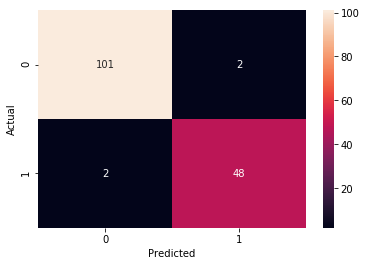

In [117]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,classification_report, recall_score
model =DecisionTreeClassifier(max_depth=5,min_samples_split=2,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [118]:
print(classification_report(y_test, y_pred))
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       103
           1       0.96      0.96      0.96        50

   micro avg       0.97      0.97      0.97       153
   macro avg       0.97      0.97      0.97       153
weighted avg       0.97      0.97      0.97       153

Precision Score: 0.96
Recall Score: 0.96
F1 Score: 0.96


- Decision Tree has a good Recall score

### Visualizing how the tree is fitting the data

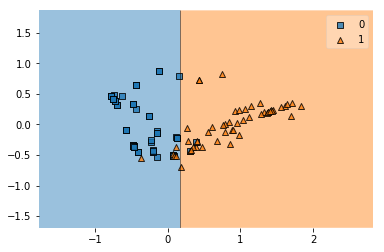

In [119]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b = X_train[150:300,[0,1]]
y_b = y_train[150:300]

dtree = DecisionTreeClassifier(max_depth=2,min_samples_split=50)
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, np.array(y_b), clf = dtree)

## Deep Learning

## i) ANN

In [191]:
X_train=scaler.fit_transform(X_train_unscaled)
X_test=scaler.transform(X_test_unscaled)

In [192]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(32,input_dim = 17 ,kernel_initializer='normal',activation = 'relu'))
#hidden layers
model1.add(Dense(16,input_dim = 12 ,kernel_initializer='normal',activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 50, batch_size = 300)

#step 4: evaluation
print(model1.evaluate(X_train, y_train))
print(model1.evaluate(X_test, y_test))

Epoch 1/50
611/611 [==============================] - 0s 272us/sample - loss: 0.6890 - acc: 0.5237
Epoch 2/50
611/611 [==============================] - 0s 10us/sample - loss: 0.6844 - acc: 0.8020
Epoch 3/50
611/611 [==============================] - 0s 10us/sample - loss: 0.6795 - acc: 0.8756
Epoch 4/50
611/611 [==============================] - 0s 13us/sample - loss: 0.6740 - acc: 0.8822
Epoch 5/50
611/611 [==============================] - 0s 10us/sample - loss: 0.6676 - acc: 0.8854
Epoch 6/50
611/611 [==============================] - 0s 8us/sample - loss: 0.6603 - acc: 0.8723
Epoch 7/50
611/611 [==============================] - 0s 8us/sample - loss: 0.6521 - acc: 0.8740
Epoch 8/50
611/611 [==============================] - 0s 10us/sample - loss: 0.6428 - acc: 0.8265
Epoch 9/50
611/611 [==============================] - 0s 8us/sample - loss: 0.6324 - acc: 0.8249
Epoch 10/50
611/611 [==============================] - 0s 10us/sample - loss: 0.6209 - acc: 0.8560
Epoch 11/50
611/611 [

Deep learning ANN model accuracy : 96.08%

In [193]:
predicted_classes = model1.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes[:,0]==y_test)[0]
incorrect_indices = np.nonzero(predicted_classes[:,0]!=y_test)[0]
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

148  classified correctly
5  classified incorrectly


## ii) MLP

In [194]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 17, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

#step 2: compile the model
model2.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model
model2.fit(X_train, y_train, epochs = 30, batch_size = 150)

#step 4: evaluate
print(model1.evaluate(X_train, y_train))
print(model1.evaluate(X_test, y_test))

Epoch 1/30
611/611 [==============================] - 0s 326us/sample - loss: 0.6859 - acc: 0.8003
Epoch 2/30
611/611 [==============================] - 0s 11us/sample - loss: 0.6810 - acc: 0.8331
Epoch 3/30
611/611 [==============================] - 0s 13us/sample - loss: 0.6755 - acc: 0.8740
Epoch 4/30
611/611 [==============================] - 0s 10us/sample - loss: 0.6701 - acc: 0.8871
Epoch 5/30
611/611 [==============================] - 0s 11us/sample - loss: 0.6642 - acc: 0.8936
Epoch 6/30
611/611 [==============================] - 0s 11us/sample - loss: 0.6574 - acc: 0.8985
Epoch 7/30
611/611 [==============================] - 0s 11us/sample - loss: 0.6502 - acc: 0.9100
Epoch 8/30
611/611 [==============================] - 0s 11us/sample - loss: 0.6419 - acc: 0.9018
Epoch 9/30
611/611 [==============================] - 0s 15us/sample - loss: 0.6321 - acc: 0.9018
Epoch 10/30
611/611 [==============================] - 0s 13us/sample - loss: 0.6213 - acc: 0.9100
Epoch 11/30
611/61

Deep learning MLP model accuracy : 96.73%

In [196]:
predicted_classes = model2.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes[:,0]==y_test)[0]
incorrect_indices = np.nonzero(predicted_classes[:,0]!=y_test)[0]
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

146  classified correctly
7  classified incorrectly


-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------

# Comparing PCA results

In [132]:
xlsx = pd.ExcelFile(r'C:\Users\nick2\Desktop\MS\Sem-2\ML\Project 2\Classification_Results_PCA.xlsx')

In [133]:
df = pd.read_excel(xlsx)
df

,Classifier,Train Score,Test Score,Precision,Recall,PCA Train Score,PCA Test Score,PCA Precision,PCA Recall
0,KNN,1.000,0.980,1,0.90625,0.980,0.96,0.95,0.92
1,Logistic Regression,1.000,1.000,1,1.00000,0.960,0.94,0.90,0.94
2,LinearSVC,0.993,0.994,1,0.98430,0.960,0.94,0.90,0.94
3,SVC,1.000,1.000,1,1.00000,0.967,0.96,0.96,0.96
4,Decision Tree,1.000,1.000,1,1.00000,0.990,0.97,0.96,0.96


- As per Train and Test Scores, KNN, Logistic Regression, SVC and Decision Tree have shown improvement after applying PCA
- These models have become more generalized after applying PCA
- Our evaluation strategy is improving Recall, based on that only KNN model has improved, for rest of the models we were already able to achieve quite a good recall score

# Best Classification Model from Project 2

In [190]:
final= pd.ExcelFile(r'C:\Users\nick2\Desktop\MS\Sem-2\ML\Project 2\Classification_Results.xlsx')
final = pd.read_excel(final)
final

,Model,Accuracy,Precision,Recall,F1 Score
0,Voting Classifier (Hard),0.954,0.950,0.92,0.93
1,Voting Classifier (Soft),0.960,0.940,0.92,0.93
2,Bagging(Decision Tree),0.990,0.980,0.98,0.98
3,Bagging(KNN),0.980,0.957,0.90,0.92
4,Pasting(Decision Tree),0.990,0.980,0.98,0.98
5,Pasting(KNN),0.970,0.950,0.92,0.93
6,Adaboost(Decision Tree),0.970,1.000,0.98,0.98
7,Adaboost(SVM),0.960,0.940,0.96,0.95
8,Gradient Boosting,0.990,0.980,0.98,0.98


- Out of all the Ensemble models we are able to get best results from Bagging and Pasting (Decision Tree), Adaboost (Decision Tree) Gradient Boosting and Bagging and Pasting Decision Tree. All having a recall of 0.98 and an accuracy of over 0.97
- With Artificial Neural Network with ANN we are able to achieve an accuracy of 96.08% with only 5 records misclassified
- With Artificial Neural Network with MLP we are able to achieve an accuracy of 96.73% with 7 records misclassified
- ANN would be a better choice in deep learning models

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------